# SEMİH ENGİN 191180037

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])
df
#Get iris dataset from library and convert a Scikit-learn dataset to a Pandas dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


# 1.Q Plot (scatter plot matrix) the Iris flower dataset

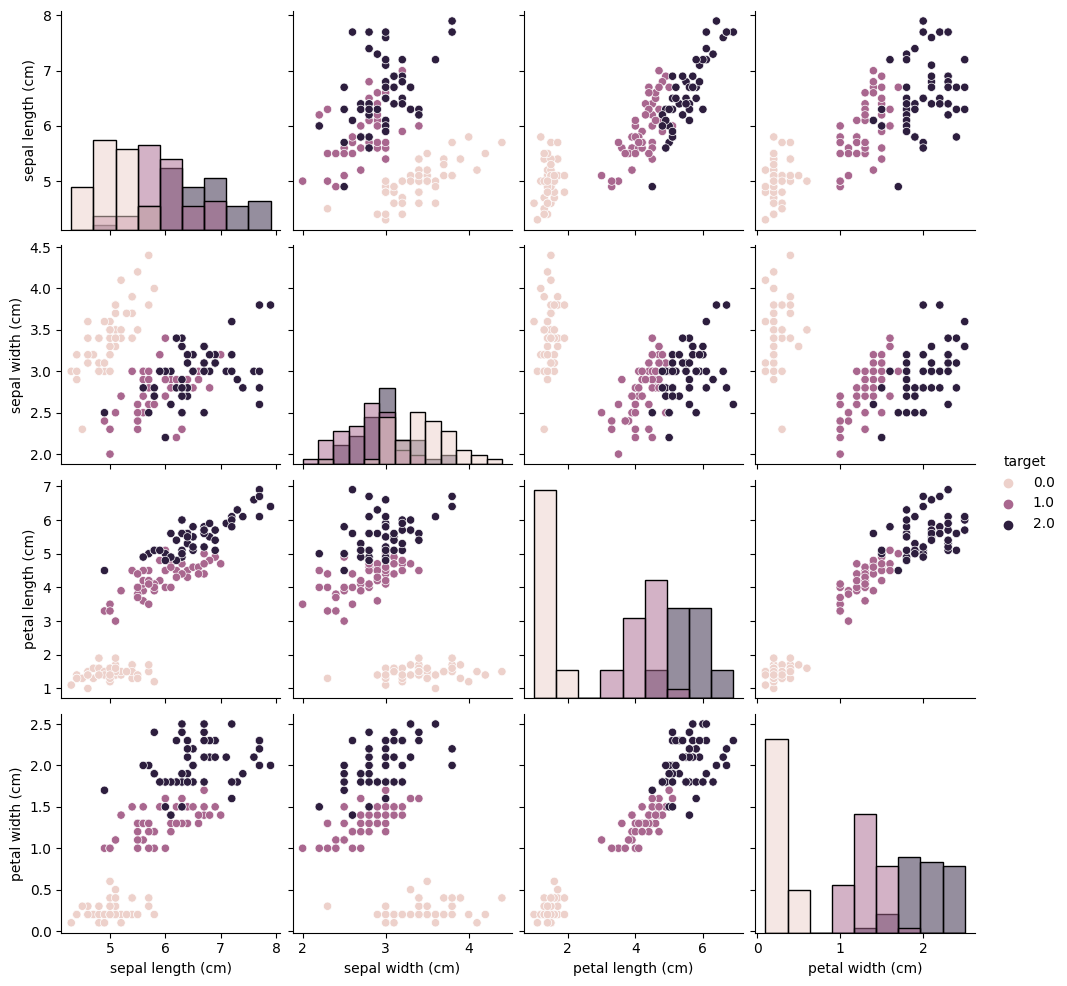

In [3]:
sns.pairplot(df, hue="target", diag_kind="hist")

In [4]:
df = df.drop(['sepal length (cm)', 'sepal width (cm)','target'], axis=1)

x = df['petal width (cm)']
y = df['petal length (cm)']
df
#Removed other data as only Petal Width and Petal Length will be used in the data

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


# 2.Q Split the dataset

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x.to_numpy(), y.to_numpy(), test_size = 0.30, random_state=50)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
#I divided our dataset into 2 with 70% 30%. The 30% part is "test".

# 3.Q  Train a Linear Regression model that learns from the training set to predict the Petal Length (cm)

In [6]:
from sklearn.linear_model import LinearRegression
lireg = LinearRegression().fit(X_train,y_train)
lireg
#I used LinearRegression() here, a Linear Regression model that learns 
#from the training set to predict the Petal Length (cm) of iris flowers

LinearRegression()


# 4.Q Mean Absolute Error and the Mean Squared Error

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae

y_pred = lireg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MEAN SQUARED ERROR VALUE : " ,(mse))

error = mae(y_test, y_pred)
print("MEAN ABSULUTE ERROR VALUE : " ,(error))

#I compared the predicted value for petal length and the actual value for petal length.

MEAN SQUARED ERROR VALUE :  0.20465494690660826
MEAN ABSULUTE ERROR VALUE :  0.35357837415289217


# 5.Q Pick a random flower then use the trained model to predict the petal length of this specific flower.

In [8]:
import random
random = random.randint(0, 44)
#Since len(y_test) = 45 elements, I generated random numbers from 0 to 44.
real = y_test[random]
pred = lireg.predict([X_test[random]])
#I used the trained model to predict the petal length
print("Difference between the predicted and actual values : " ,(pred-real))
#Calculate the difference between the predicted and actual values and output.
print("Mean Squared Error :" ,(mean_squared_error(pred,[real])))
#Mean Squared Error calculated for this particular test

Difference between the predicted and actual values :  [0.47810697]
Mean Squared Error : 0.22858627752611949


# 6.Q Fit a polynomial of degree 1, basically a line, to the data using the polyfit() function from NumPy, output  form of mx + b = 0

In [9]:
eq = np.polyfit(x,y,1)
#With polyfit I fit a 1st order polynomial, basically a line.
a= np.poly1d(eq)
print((a),"= 0")
#I converted the equation to mx + b = 0.

 
2.23 x + 1.084 = 0


# 7.Q Plot the polynomial of degree (line) , data instances (Iris flowers) and their Petal Width and Petal Length values on the axes.

Text(0, 0.5, 'Petal Length')

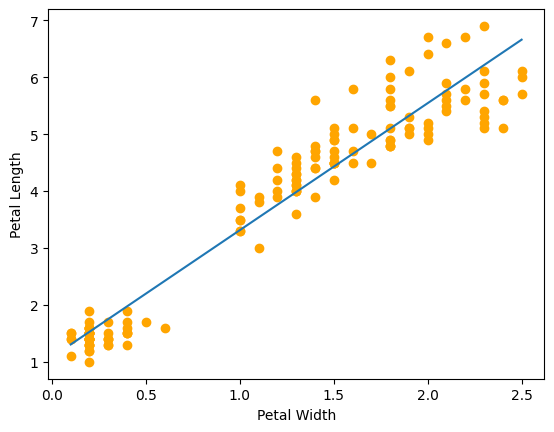

In [10]:
df = df.sort_values(by='petal width (cm)')
x = df['petal width (cm)']
y = df['petal length (cm)']

plt.scatter(x, y,c='orange')
plt.plot(x, a(x))
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
#I sorted the values, wrote the values on the axes and plot scatter plot 

# 8.Q Model the data using the parameters of the fitted straight line, output the value of R²

In [11]:
from sklearn.metrics import r2_score
r2_score(y, a(x))
#I found how well the model fits the data with the r2_score I imported.

0.9271098389904927

# 9.Q Fit a polynomial of degree 2, basically a line, to the data using the polyfit() function from NumPy, output  form of  ax2 + bx+ c = 0

In [12]:
eq = np.polyfit(x,y,2)
#With polyfit I fit a 2st order polynomial, basically a line.
a= np.poly1d(eq)
print(a ,"= 0")
#I converted the equation to ax2 + bx+ c = 0.

         2
-0.5277 x + 3.455 x + 0.6781 = 0


# 10.Q Plot the polynomial of second-degree (line) , data instances (Iris flowers) and their Petal Width and Petal Length values on the axes.

Text(0, 0.5, 'Petal Length')

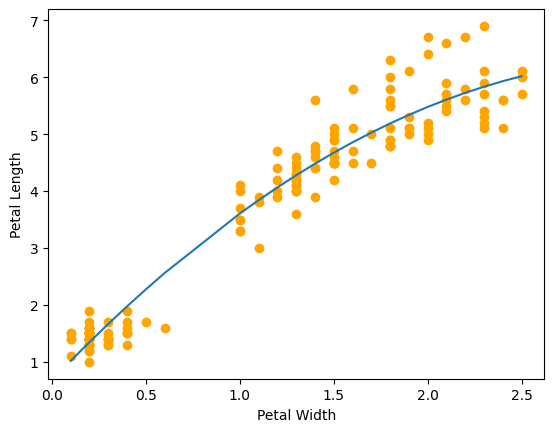

In [13]:
plt.scatter(x, y,c='orange')
plt.plot(x, a(x))
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
#Wrote the values on the axes and plot scatter plot 